In [56]:
import pandas as pd
from scipy.io import wavfile
from egg_io import *
from fpca_preprocess import *
import matplotlib.pyplot as plt
all_data = pd.read_csv("voiceSauce.csv")
TIMEPOINT = 4

In [57]:
# savedRow = random_test_file(all_data)
savedRow = grabSpecificFile(all_data, 'egg_melt/Zapotec/speaker1M_eM3.wav')
savedRow

speaker_id                         Zapotec_M1
speaker_number                              1
speaker_sex                                 M
language                              Zapotec
language_variety    Santiago Matatlan Zapotec
                              ...            
SQ2_SQ1                                 0.943
SQ4_SQ3                                  2.44
ratio                                   0.176
LPhon                           Zapotec-Modal
SQ                                   0.386475
Name: 6016, Length: 80, dtype: object

In [58]:
samplerate, data = wavfile.read(filepath(savedRow))
startSample, endSample = sampleEndpoints(savedRow.segment_start, savedRow.segment_end, samplerate, timepoint = TIMEPOINT)
egg = data[startSample:endSample]

/var/folders/yw/bhpwdykx1ds4grc1_xcqh49r0000gn/T/ipykernel_87560/2311534566.py:1: WavFileWarning: Reached EOF prematurely; finished at 20746 bytes, expected 41412 bytes from header.
  samplerate, data = wavfile.read(filepath(savedRow))


In [59]:
peaks = pitchmark(egg, samplerate, savedRow.strF0)
threshold = find_threshold(egg, peaks)

<function matplotlib.pyplot.show(close=None, block=None)>

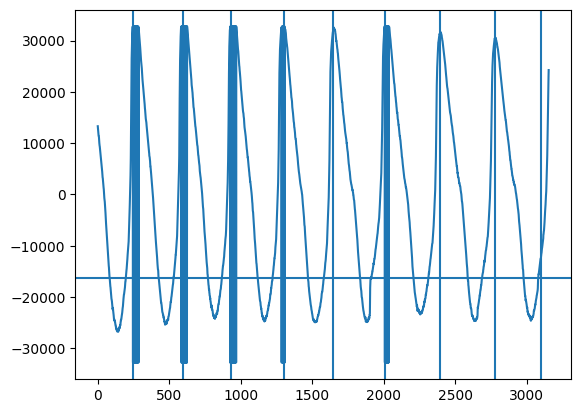

In [60]:
plt.plot(egg)
for peak in peaks:
    plt.axvline(peak)
plt.axhline(threshold)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

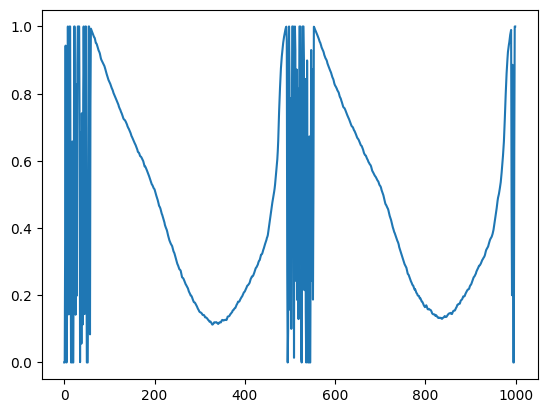

In [61]:
clipped_egg = clip_egg(egg, threshold, peaks)
# TODO: we're getting list index out of range here, in low-F0 cases. look into that if it happens a bunch!
# TODO: also, a lot of the gujarati data is reeeally choppy, i'd look into ways of making this algorithm more robust!
# ^ further, sometimes even in other languages the threshold is too low. raising it would come at the cost of research backing, but might give us more pages!!!
final = normalize_egg(clipped_egg)

plt.plot(final)
plt.show